In [1]:
import tensorflow as tf

In [2]:
# Declaring constants


In [3]:
# Declaring variables

In [4]:
v

<tf.Variable 'Variable:0' shape=(2,) dtype=float32, numpy=array([1., 2.], dtype=float32)>

In [5]:
# Show variable

array([1., 2.], dtype=float32)

# Simple Optimization

In [6]:
opt = tf.optimizers.SGD()

In [7]:
# Gradient tapes!
with tf.GradientTape() as tape:
    y = tf.tensordot(c,v,1) -1

In [8]:
tape.gradient(y,v)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([-1.,  1.], dtype=float32)>

In [9]:
loss = lambda : tf.tensordot(c,v,1)**2 -1

In [10]:
opt.minimize(loss, [v])

<tf.Variable 'UnreadVariable' shape=() dtype=int64, numpy=1>

In [11]:
v = tf.Variable([1.0, 2.0])
var_vals, loss_vals = [], []
for _ in range(100):
    opt.minimize(loss, [v])
    var_vals.append(v.numpy())
    loss_vals.append(loss())

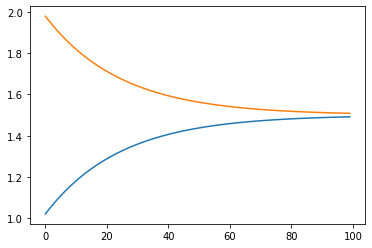

In [12]:
import matplotlib.pyplot as plt
plt.plot(var_vals)

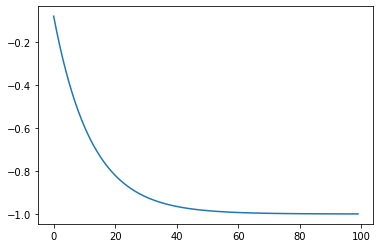

In [13]:
plt.plot(loss_vals)

# Optimising an integral function
# $\max_a \int_\Omega dP(\omega) f_\omega(a)$
# We can calculate the gradient as follows:
# $\nabla_a \int_\Omega dP(\omega) f_\omega(a) = \int_\Omega dP(\omega) \nabla_a f_\omega(a)$
# This is actually identical to the expected gradient:
# $\int_\Omega dP(\omega) [\nabla_a f_\omega(a)] = E_{\omega \sim P} [\nabla_a f_\omega(a)]$
# Consequently,
# $E_{\omega \sim P} [\nabla_a f_\omega(a)]  \approx \frac{1}{K} \sum_{k=1}^K [\nabla_a f_{\omega^k}(a)]$ with $\omega^k \sim P$. 
# In addition
# $E_{\omega \sim P} [\nabla_a f_\omega(a)] = E_{\omega^{k} \sim P} \{ \frac{1}{K} \sum_{k=1}^K [\nabla_a f_{\omega^k}(a)] \}$. 

In [8]:
import tensorflow_probability as tfp
tfd = tfp.distributions
dist = tfd.Normal(loc=1,scale=1)


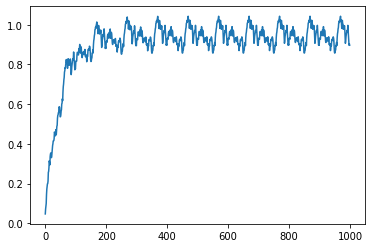

In [27]:
import tensorflow as tf
opt = tf.optimizers.SGD()
import numpy as np
a = tf.Variable(0.0) # my action variable

## Sample from the distribution
n_samples=100
omega = dist.sample([n_samples]) 

## minimise the squared difference
loss = lambda : (sample - a)**2 #loss function

## Loop set-up
n_iter=int (1000 / n_samples)
n_steps = n_iter * n_samples
value = np.zeros(n_steps) # save the values

# Hand implementation of SGD
t=0
for _ in range(n_iter):
    for i in range(n_samples):
        # fill in!
        sample = tf.constant(omega[i])
        opt.minimize(loss, var_list=[a])
        value[t] = a
        t+=1
# Plot result
import matplotlib.pyplot as plt
plt.plot(value)

In [26]:
omega

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([1.4019091 , 2.6845899 , 1.1123427 , 1.9778327 , 1.9409082 ,
       1.8637617 , 3.211172  , 0.85029334, 1.8694514 , 1.7414196 ],
      dtype=float32)>

In [ ]:
?opt